# Decomposition using SVD
### Singular value Decomposition - A Matrix Factorization Method

1. Its applicable to any real world Matrix m * n. unlike Eigen Vector its not only applicable to square matrix
2. The given matrix (A) is decomposed into : U * D * V^T
    1. U - Left Signular vectors
    2. D - Diagonal Vectors
    3. V^T - Right Singular Vectors
3. U & V are the orthogonal vectors i.e U == U Inverse -> U*U^T = U^T*U

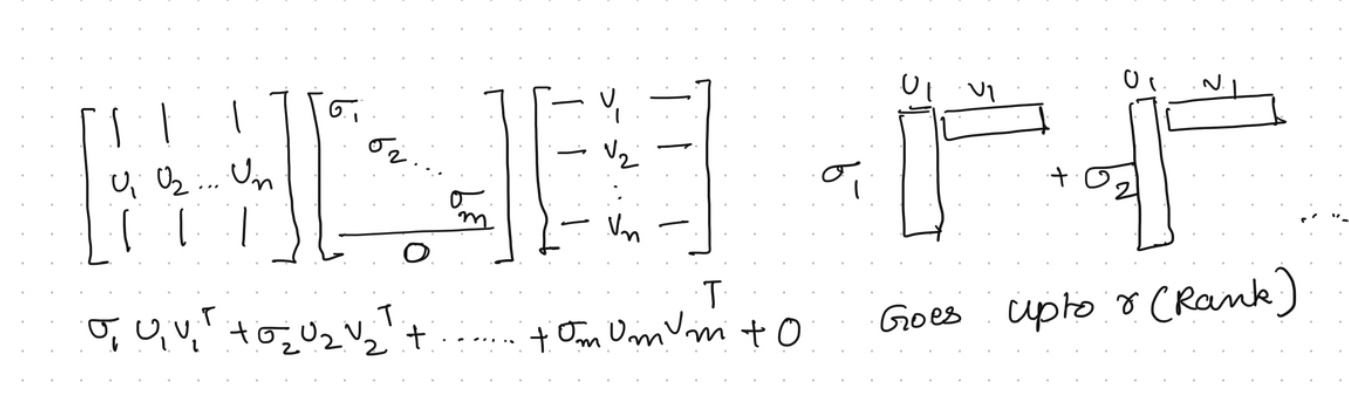

### Import Libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import os

### Read the image of your choice

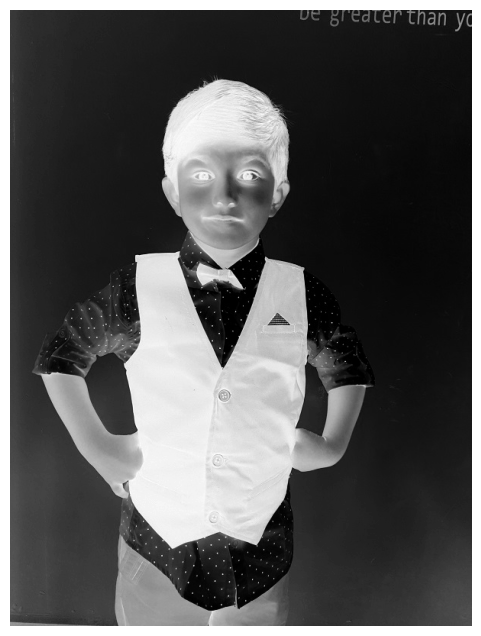

In [5]:
#runtime configuration parameters
plt.rcParams['figure.figsize'] = [16,8]
kar_img = imread('.././csv/Karthik.jpg')
grayscale_img = np.mean(kar_img,axis=-1)
img = plt.imshow(256-grayscale_img,cmap='gray') #invert we do 256
plt.axis('off')
plt.show()

### U, Sigma and V are factorised to get r components, where r is essentially the rank
# A = U * S * V^T
# A * V = U * S

In [12]:
U, S, VT = np.linalg.svd(grayscale_img,full_matrices=False) # Doing Economy SVD - stops with max Rank 
S

array([1.32256674e+05, 2.57908339e+04, 1.78797441e+04, 9.66232368e+03,
       8.23222337e+03, 7.44731368e+03, 6.51698770e+03, 5.61251362e+03,
       4.97429939e+03, 4.59324348e+03, 3.93924672e+03, 3.58404460e+03,
       3.08387319e+03, 2.89406416e+03, 2.58936498e+03, 2.50833962e+03,
       2.47391322e+03, 2.10841355e+03, 2.01965477e+03, 1.89646048e+03,
       1.88955766e+03, 1.79620800e+03, 1.73427338e+03, 1.64053459e+03,
       1.59900194e+03, 1.56881991e+03, 1.50904392e+03, 1.48584607e+03,
       1.42149300e+03, 1.41230437e+03, 1.33935153e+03, 1.32016409e+03,
       1.28043877e+03, 1.24997724e+03, 1.21189083e+03, 1.19190767e+03,
       1.12436361e+03, 1.12006233e+03, 1.09814838e+03, 1.08753321e+03,
       1.03424255e+03, 1.02513845e+03, 9.95525148e+02, 9.73032486e+02,
       9.66392499e+02, 9.38549992e+02, 9.20542367e+02, 9.05343116e+02,
       8.86261913e+02, 8.73023436e+02, 8.64097354e+02, 8.52306395e+02,
       8.28748599e+02, 8.18803695e+02, 8.04255505e+02, 7.91163860e+02,
      

In [13]:
S = np.diag(S) #Extract only the diagnal 

In [14]:
S

array([[1.32256674e+05, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.57908339e+04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.78797441e+04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.16482915e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 3.00676068e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 2.91426260e+00]])

### Now we check for different Ranks to see which captures most important featues
A Rank of a matrix is essentially the number of linearly independent rows
The rank can be calculated by one of the below methods:
1. Minor Method : Rank of a matrix is equal to the order of the matrix if it is a non-singular matrix i,e det != 0.
2. Echelon Form : Rank of a matrix is equal to the number of non-zero rows if it is in Echelon Form.
3. Normal Form : Rank of matrix is equal to the order of identity matrix in it if it is in normal form.

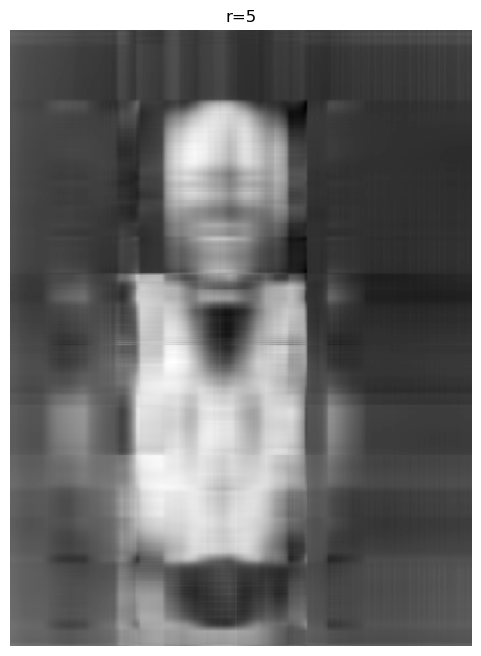

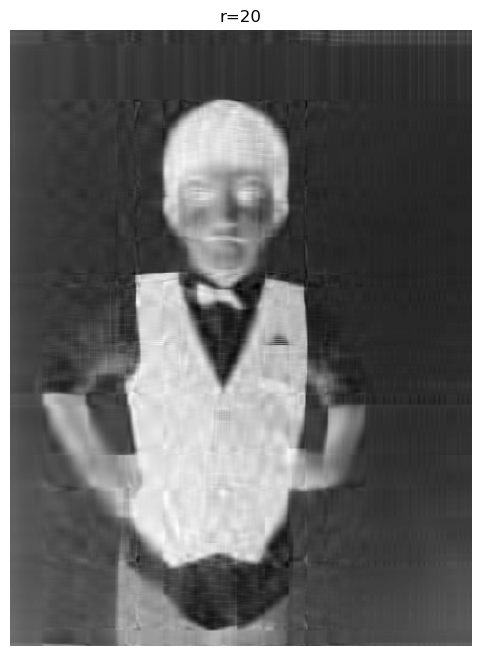

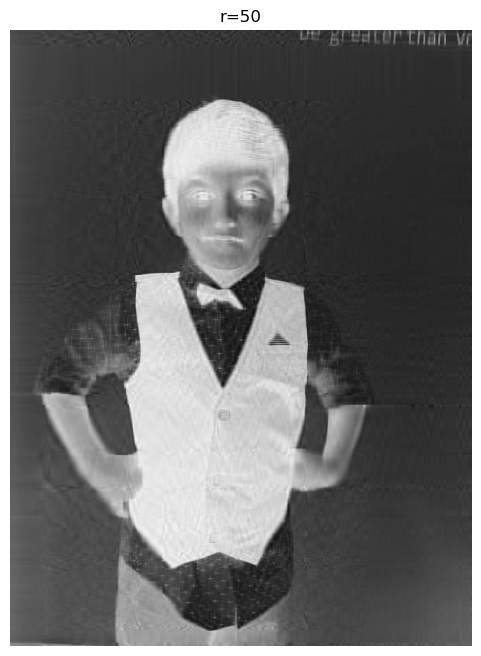

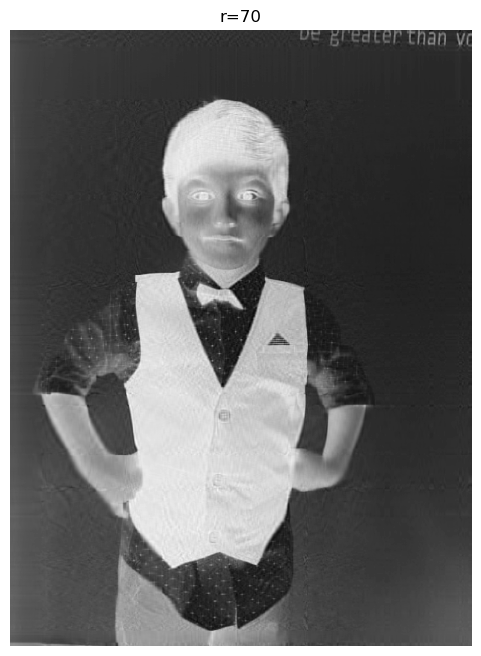

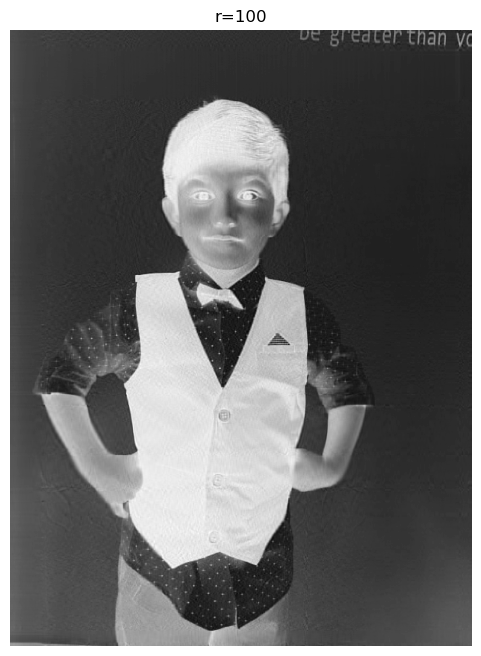

In [16]:
i = 0
for r in (5,20,50,70,100):
    img_approx = U[:,:r] @ S[0:r,:r] @  VT[:r,:] # @ Matrix Multiplication
    plt.figure(i+1)
    i += 1 
    img = plt.imshow(256-img_approx,cmap='gray') #invert we do 256
    plt.axis('off')
    plt.title(f"r="+str(r))
    plt.show()
    

@ Rank  70 & 100  the image is pretty clear. Therefore even if take rank 100, we can ensure that by captruing 12% of the data we can get a good reconstruction of image

In [17]:
#% of row and column used out of total pixel for rank = 100
rank_per = (100/len(grayscale_img)) * 100
print(round(rank_per,2),'%')

12.39 %


### General Idea behind SVD

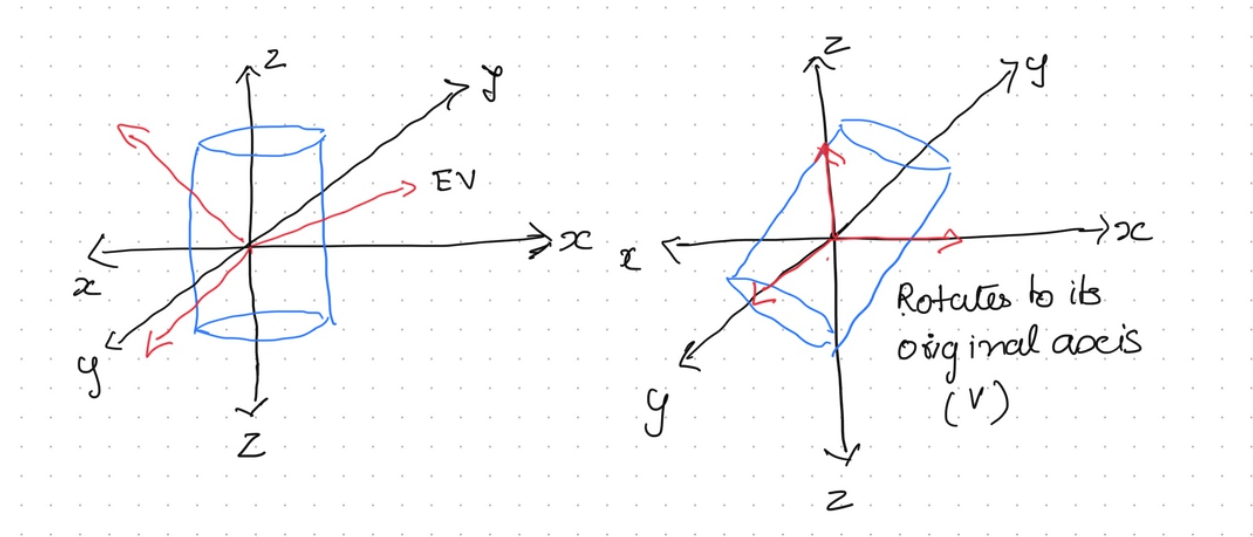

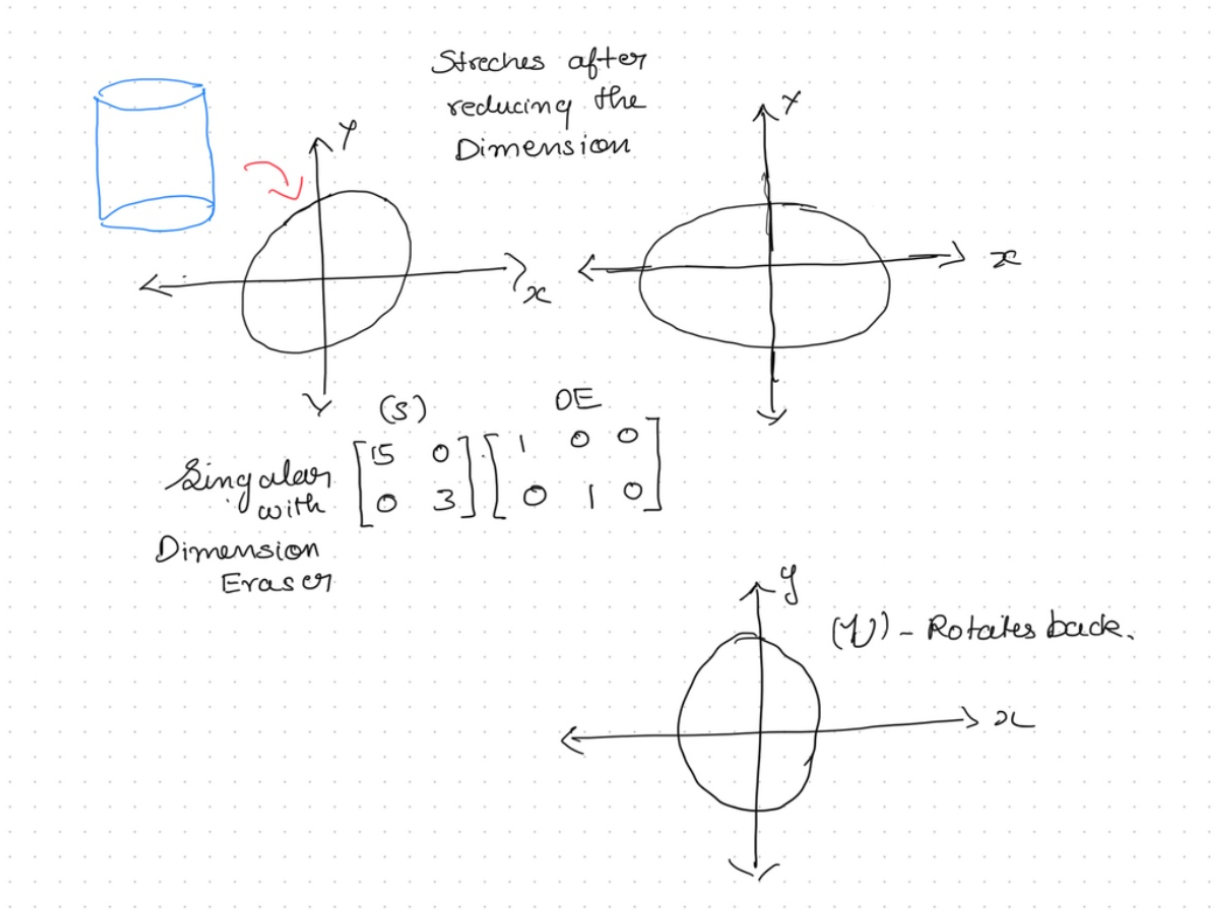

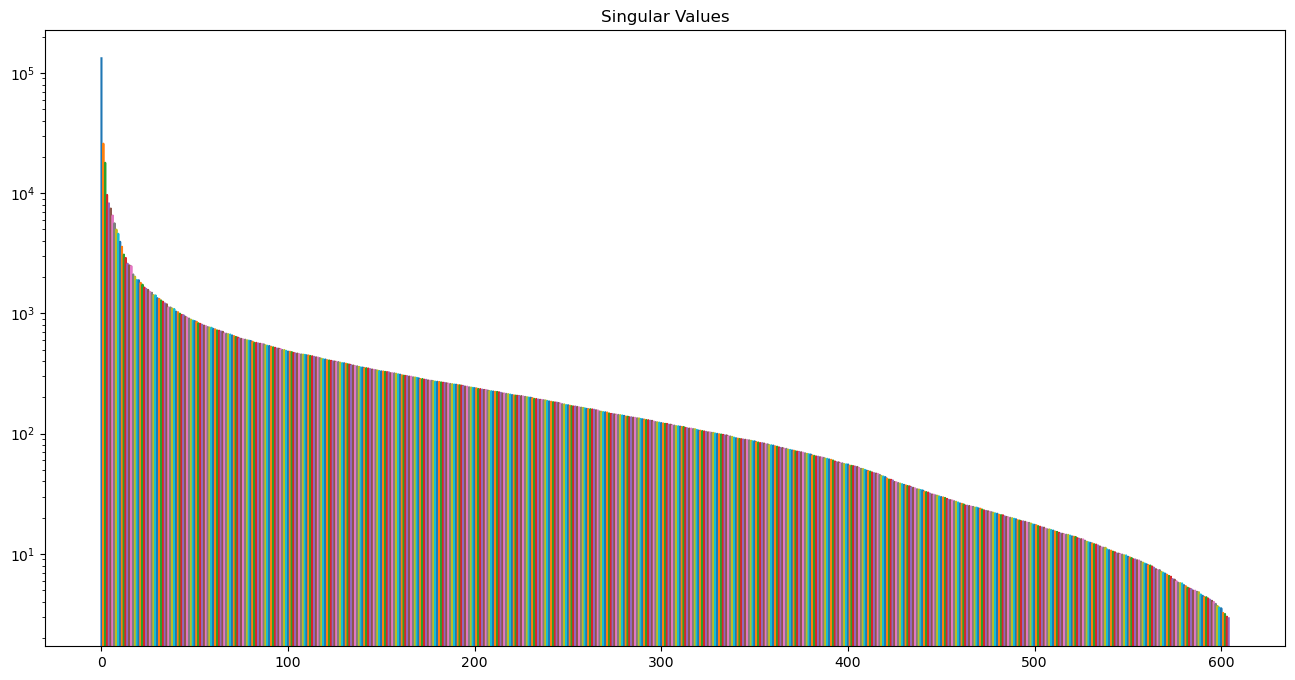

In [41]:
# plot the Singular values (S) using log function
plt.figure(1)
plt.semilogy(S) #to plot log image
plt.title('Singular Values')
plt.show()

### If we can see in the above plot the first 20 to 30 nodes capture most of the important information. This helps us to keep the first few large signular values to truncate the rest. The same can be visualized in the Cummulative plot as well. 

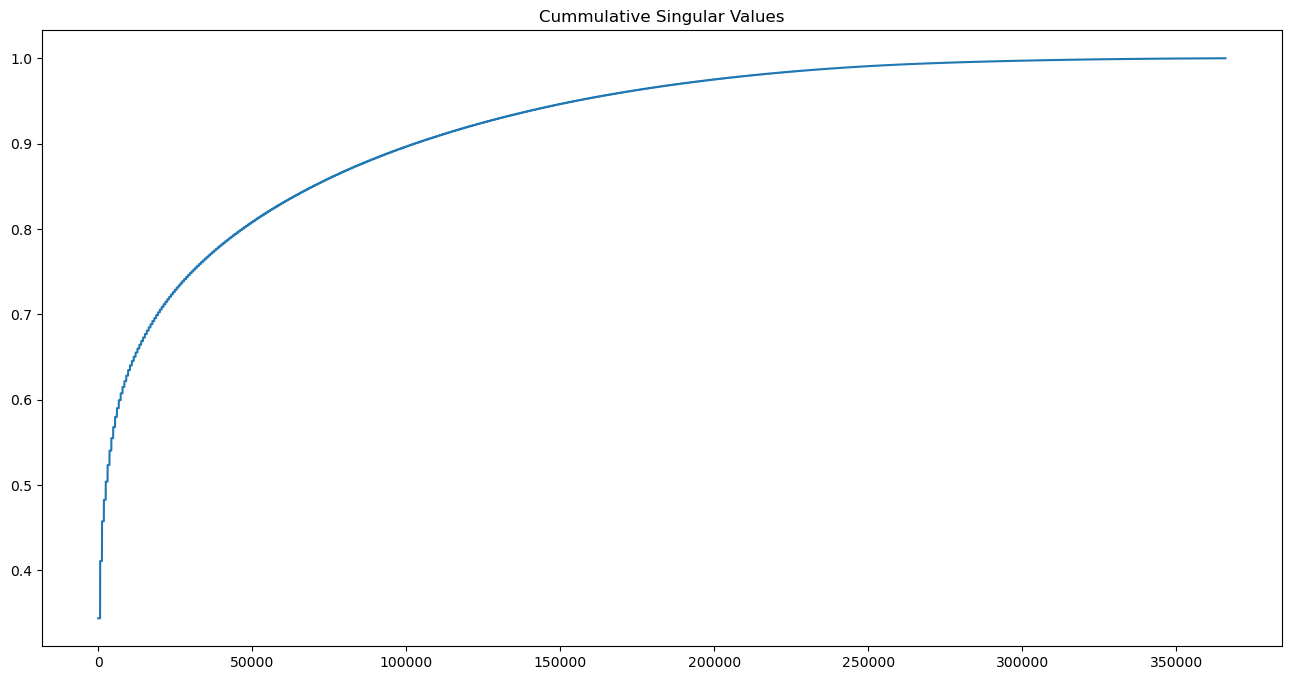

In [19]:
#np.cumsum(S) - Sigma 1 to r np.sum(S) - Sigma 1 to J
plt.figure(2)
S_cumsum = np.cumsum(S)/np.sum(S)
plt.plot(S_cumsum) #to plot log image
plt.title('Cummulative Singular Values')
plt.show()

### References
    https://www.youtube.com/watch?v=H7qMMudo3e8&list=RDCMUCm5mt-A4w61lknZ9lCsZtBw&index=3